## Assignment Solution:

1. Suppose you fired Jackie and you now only had Shahrukh’s and Brad’s forecasts for next quarter. Shahrukh predicts 1.45 and Brad says 1.19. What would you predict? 

> - **`my prdiction is = 1.42`** acording to the next built model. 

2. In practice (if you were in this company) would you have considered taking the average of the forecasts of these 2 experts to answer question 1? 

> - **No** may be the average of the forecasts of these 2 experts be almost equal to the actual value but i can``t depend on others' predictions as we can see brad has a vary range of errors according to figure 2 and table 3 in addition to the R-square in my OLS analysis. 

3. Which expert do you suggest to fire? Brad, Shahrukh or Jackie? 

> - **Brad** because acording to OLS analysis get less R_square . 

4. Did you use linear regression for your analysis to answer question 1? Question 3? 

> - **Yes** for both question on q1 bulid a time series model to get the next quarter prediction ,also on q3 use OLS model for analysis each expert predictions .

5. Would you have used linear regression in your job to answer question 1? What about question 3?

> - **Yes** for q1 I prefered to use time series as a specific type of linear regression model , **but** q3 we can get the answer from graphs without needs to use linear regression model . 

## reading Data   

In [1]:
my_file = open('data.txt')
my_file.read()

'Date,Shahrukh,Jackie Chan,Brad,Actual\n3/31/1999, 0.93, 0.86, 1.31 ,1.07 \n6/30/1999, 0.85, 0.81, 1.04, 1.03 \n9/30/1999 ,1.18, 1.12 ,0.69, 1.07 \n12/31/1999, 0.91, 0.93, 0.94 ,1.00\n 3/31/2000 ,0.87, 0.85, 0.96, 0.95 \n6/30/2000, 1.13 ,1.03 ,0.45 ,0.96 \n9/29/2000 ,0.69, 1.03 ,1.03, 0.88 \n12/29/2000 ,0.83 ,0.75 ,0.90 ,0.93\n 3/30/2001 ,0.92, 1.00, 0.83, 0.88 \n6/29/2001 ,0.77 ,0.89 ,1.09 ,0.85 \n9/28/2001, 1.14 ,0.92, 0.51, 0.92 \n12/31/2001 ,0.75 ,0.63, 0.83 ,0.88 \n3/29/2002 ,0.92, 0.90, 0.83, 0.87 \n6/28/2002 ,1.00 ,0.98 ,0.79 ,1.00 \n9/30/2002 ,1.16, 1.08, 0.68 ,0.99 \n12/31/2002, 0.89 ,1.26 ,1.45 ,1.04 \n3/31/2003 ,1.04 ,1.02, 1.45 ,1.09 \n6/30/2003 ,1.02 ,1.12 ,1.06 ,1.14 \n9/30/2003 ,1.20, 1.12 ,1.24 ,1.17 \n12/31/2003 ,1.09 ,1.19 ,1.39 ,1.25 \n3/31/2004 ,1.42, 1.28 ,1.10, 1.22 \n6/30/2004 ,1.23 ,1.16 ,1.21 ,1.21 \n9/30/2004 ,1.29 ,1.15, 0.68 ,1.23 \n12/31/2004 ,1.43, 1.40 ,1.39 ,1.36 \n3/31/2005 ,1.34 ,1.44, 1.34 ,1.30 \n6/30/2005 ,1.05 ,1.26 ,1.31 ,1.20 \n9/30/2005 ,1.15, 1

In [2]:
import pandas as pd
read_file = pd.read_csv (r'data.txt')
read_file.to_csv ('train.csv', index=None)

In [3]:
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)
series.head()

C:\Users\Decimal\AppData\Local\Temp\ipykernel_5664\3192234847.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)


,Shahrukh,Jackie Chan,Brad,Actual
Date,,,,
1999-03-31,0.93,0.86,1.31,1.07
1999-06-30,0.85,0.81,1.04,1.03
1999-09-30,1.18,1.12,0.69,1.07
1999-12-31,0.91,0.93,0.94,1.00
2000-03-31,0.87,0.85,0.96,0.95


## Analytics

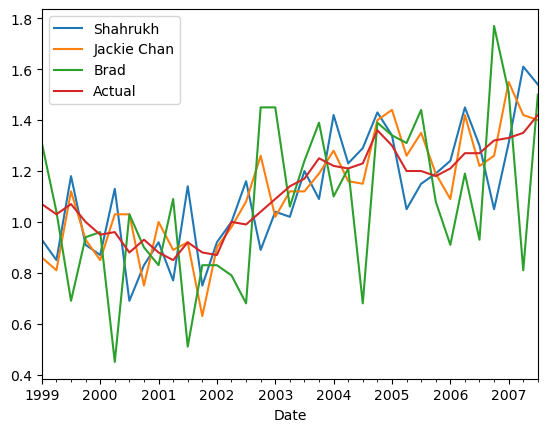

In [4]:
series.plot()
pyplot.show()

We can see that the dataset has a clear trend.

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas. The example below plots the autocorrelation for a large number of lags in the time series.

C:\Users\Decimal\AppData\Local\Temp\ipykernel_5664\1423975354.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)


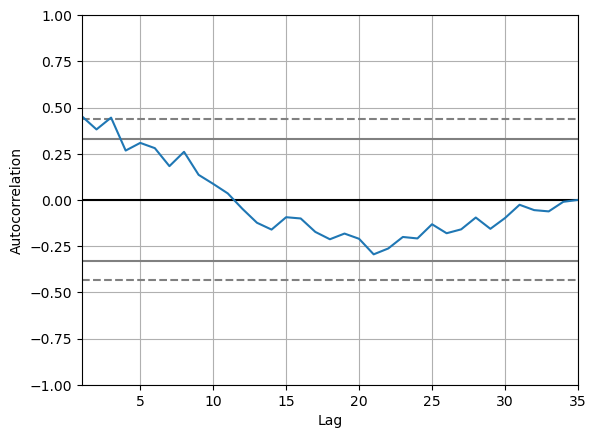

In [5]:
from pandas.plotting import autocorrelation_plot

series = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)
autocorrelation_plot(series)
pyplot.show()

we can see that there is a positive correlation with the first 5-to-10 lags that is perhaps significant for the first 5 lags.

A good starting point for the AR parameter of the model may be 5.


In [6]:
# fit an ARIMA model and plot residual errors
from statsmodels.tsa.arima.model import ARIMA
# load dataset
series = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)
series.index = series.index.to_period('M')
series

C:\Users\Decimal\AppData\Local\Temp\ipykernel_5664\3294930430.py:4: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)


,Shahrukh,Jackie Chan,Brad,Actual
Date,,,,
1999-03,0.93,0.86,1.31,1.07
1999-06,0.85,0.81,1.04,1.03
1999-09,1.18,1.12,0.69,1.07
1999-12,0.91,0.93,0.94,1.00
2000-03,0.87,0.85,0.96,0.95
2000-06,1.13,1.03,0.45,0.96
2000-09,0.69,1.03,1.03,0.88
2000-12,0.83,0.75,0.90,0.93
2001-03,0.92,1.00,0.83,0.88


In [7]:
# fit model
model = ARIMA(series.Actual, order=(5,1,0))
model_fit = model.fit()

In [8]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  52.145
Date:                Thu, 02 Mar 2023   AIC                            -92.290
Time:                        10:44:13   BIC                            -83.132
Sample:                    03-31-1999   HQIC                           -89.167
                         - 09-30-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0080      0.197     -0.040      0.968      -0.395       0.379
ar.L2         -0.0429      0.190     -0.226      0.821      -0.415       0.329
ar.L3          0.3126      0.223      1.400      0.1

In our example, Ll : L5 are not statistically significant as their p-values are above the 0.05 threshold.

This summarizes the coefficient values used as well as the skill of the fit on the on the in-sample observations.

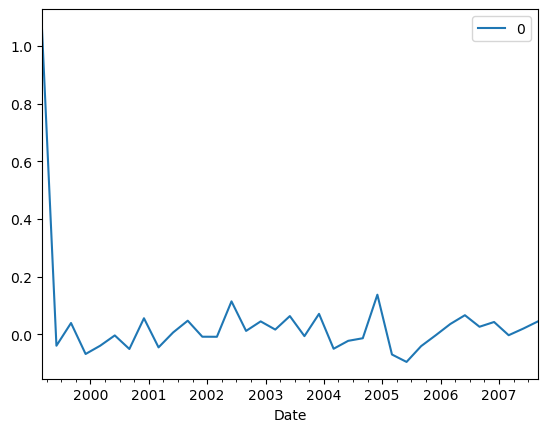

In [9]:
from pandas import DataFrame
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

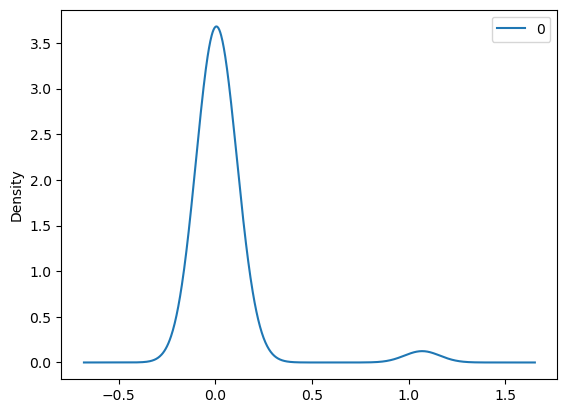

               0
count  35.000000
mean    0.037985
std     0.186832
min    -0.096228
25%    -0.031487
50%     0.006089
75%     0.044359
max     1.070000


In [10]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

 we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).


In [11]:
series.drop(series.iloc[:, 0:3], axis=1, inplace=True)
series

,Actual
Date,
1999-03,1.07
1999-06,1.03
1999-09,1.07
1999-12,1.00
2000-03,0.95
2000-06,0.96
2000-09,0.88
2000-12,0.93
2001-03,0.88


In [12]:
ser = series['Actual'].squeeze()
ser

Date
1999-03    1.07
1999-06    1.03
1999-09    1.07
1999-12    1.00
2000-03    0.95
2000-06    0.96
2000-09    0.88
2000-12    0.93
2001-03    0.88
2001-06    0.85
2001-09    0.92
2001-12    0.88
2002-03    0.87
2002-06    1.00
2002-09    0.99
2002-12    1.04
2003-03    1.09
2003-06    1.14
2003-09    1.17
2003-12    1.25
2004-03    1.22
2004-06    1.21
2004-09    1.23
2004-12    1.36
2005-03    1.30
2005-06    1.20
2005-09    1.20
2005-12    1.18
2006-03    1.21
2006-06    1.27
2006-09    1.27
2006-12    1.32
2007-03    1.33
2007-06    1.35
2007-09    1.42
Freq: M, Name: Actual, dtype: float64

## Train & Evaluations

In [13]:
# evaluate an ARIMA model using a walk-forward validation
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = ser.values
X

array([1.07, 1.03, 1.07, 1.  , 0.95, 0.96, 0.88, 0.93, 0.88, 0.85, 0.92,
       0.88, 0.87, 1.  , 0.99, 1.04, 1.09, 1.14, 1.17, 1.25, 1.22, 1.21,
       1.23, 1.36, 1.3 , 1.2 , 1.2 , 1.18, 1.21, 1.27, 1.27, 1.32, 1.33,
       1.35, 1.42])

In [14]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
history

[1.07,
 1.03,
 1.07,
 1.0,
 0.95,
 0.96,
 0.88,
 0.93,
 0.88,
 0.85,
 0.92,
 0.88,
 0.87,
 1.0,
 0.99,
 1.04,
 1.09,
 1.14,
 1.17,
 1.25,
 1.22,
 1.21,
 1.23]

In [15]:
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=1.185640, expected=1.360000
predicted=1.323677, expected=1.300000
predicted=1.336980, expected=1.200000
predicted=1.299613, expected=1.200000
predicted=1.218999, expected=1.180000
predicted=1.166555, expected=1.210000
predicted=1.187022, expected=1.270000
predicted=1.240894, expected=1.270000
predicted=1.274571, expected=1.320000
predicted=1.331963, expected=1.330000
predicted=1.328483, expected=1.350000
predicted=1.372642, expected=1.420000


Test RMSE: 0.079


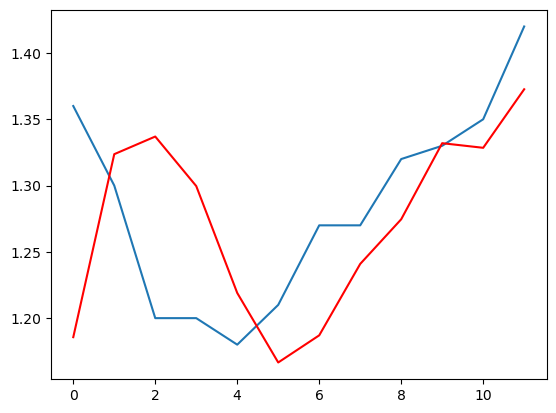

In [16]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## predicting the next quarter

In [17]:
model = ARIMA(history, order=(5,1,0))
model_fit = model.fit()
model_fit.forecast()

array([1.4196194])

### !! Using OLS Analysis to firing the worest expert 

In [18]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import random

df = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)
df

C:\Users\Decimal\AppData\Local\Temp\ipykernel_5664\2664691136.py:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv('train.csv', header=0 , index_col=0, squeeze=True, parse_dates=True)


,Shahrukh,Jackie Chan,Brad,Actual
Date,,,,
1999-03-31,0.93,0.86,1.31,1.07
1999-06-30,0.85,0.81,1.04,1.03
1999-09-30,1.18,1.12,0.69,1.07
1999-12-31,0.91,0.93,0.94,1.00
2000-03-31,0.87,0.85,0.96,0.95
2000-06-30,1.13,1.03,0.45,0.96
2000-09-29,0.69,1.03,1.03,0.88
2000-12-29,0.83,0.75,0.90,0.93
2001-03-30,0.92,1.00,0.83,0.88


In [19]:
# Train test split
X=df.drop(columns=['Actual'])
y=df[['Actual']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [20]:
# Select only one feature in regression model
X_train1 = X_train['Shahrukh']

In [21]:
# Add a constant
X_train1 = sm.add_constant(X_train1)

# Create a first ols model
model_1 = sm.OLS(y_train, X_train1).fit()

In [22]:
# Check parameters created
model_1.params

const       0.443666
Shahrukh    0.603987
dtype: float64

In [23]:
# Summary of the model
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     54.02
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.34e-07
Time:                        10:44:16   Log-Likelihood:                 24.675
No. Observations:                  24   AIC:                            -45.35
Df Residuals:                      22   BIC:                            -42.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4437      0.095      4.691      0.0

In [24]:
# Select only one feature in regression model
X_train2 = X_train['Jackie Chan']

In [25]:
# Add a constant
X_train2 = sm.add_constant(X_train2)

# Create a first ols model
model_2 = sm.OLS(y_train, X_train2).fit()

In [26]:
# Check parameters created
model_2.params

const          0.356985
Jackie Chan    0.669414
dtype: float64

In [27]:
# Summary of the model
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     61.64
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           8.06e-08
Time:                        10:44:16   Log-Likelihood:                 25.821
No. Observations:                  24   AIC:                            -47.64
Df Residuals:                      22   BIC:                            -45.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3570      0.099      3.590      

In [28]:
# Select only one feature in regression model
X_train3 = X_train['Brad']

In [29]:
# Add a constant
X_train3 = sm.add_constant(X_train3)

# Create a first ols model
model_3 = sm.OLS(y_train, X_train3).fit()

In [30]:
# Check parameters created
model_3.params

const    0.879792
Brad     0.231812
dtype: float64

In [31]:
# Summary of the model
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Actual   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     5.212
Date:                Thu, 02 Mar 2023   Prob (F-statistic):             0.0325
Time:                        10:44:16   Log-Likelihood:                 12.347
No. Observations:                  24   AIC:                            -20.69
Df Residuals:                      22   BIC:                            -18.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8798      0.112      7.861      0.0